# sentiment analysis

## 1. importing all libraries

In [23]:
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from nltk.corpus import stopwords
import pandas as pd
from string import punctuation

In [89]:
from sklearn.metrics import classification_report, confusion_matrix

In [114]:
from sklearn.svm import SVC

In [130]:
from xgboost import XGBClassifier

In [143]:
import seaborn as sns

## 2. data aquisition

In [8]:
df = pd.read_csv('Train.csv')
df.head()

,text,label
0,I grew up (b. 1965) watching and loving the Th...,0
1,"When I put this movie in my DVD player, and sa...",0
2,Why do people who do not know what a particula...,0
3,Even though I have great interest in Biblical ...,0
4,Im a die hard Dads Army fan and nothing will e...,1


<AxesSubplot:xlabel='label', ylabel='count'>

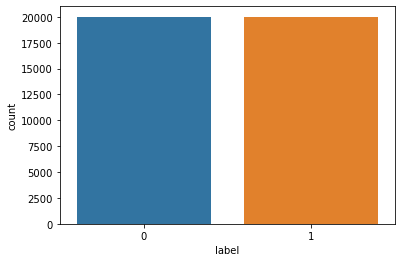

In [144]:
sns.countplot(x=df['label'])

## 3. data splitting

In [12]:
X = df['text']
y = df['label']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state = 42, stratify = y)

0        0
1        0
2        0
3        0
4        1
        ..
39995    1
39996    1
39997    0
39998    1
39999    1
Name: label, Length: 40000, dtype: int64

## 4. basic preprocessing

#### 4.1. tokenization

In [19]:
def tokenization(data):
    text = word_tokenize(data)
    return text
x_train_tokens = X_train.apply(tokenization)
x_test_tokens = X_test.apply(tokenization)

#### 4.2 cleaning

In [25]:
# removing punctuations and numbers
def cleaning(data):
    text = [i for i in data if (i not in punctuation) and (i.isalpha())]
    return text
x_train_clean = x_train_tokens.apply(cleaning)
x_test_clean = x_test_tokens.apply(cleaning)   

#### 4.3 normalization

In [26]:
def normalization(data):
    text = [i.lower() for i in data]
    return text
x_train_normalized = x_train_clean.apply(normalization)
x_test_normalized = x_test_clean.apply(normalization)   

#### 4.4 stemming and lemmatization

In [30]:
# lemmatization
def lemmatization(data):
    lemma = WordNetLemmatizer()
    lemma_text = []
    for i in data:
        text = lemma.lemmatize(i)
        lemma_text.append(text)
    return lemma_text
x_train_lemma = x_train_normalized.apply(lemmatization)
x_test_lemma = x_test_normalized.apply(lemmatization)

In [32]:
x_train_lemma

34212    [if, i, accidentally, stumbled, across, this, ...
295      [in, relative, term, having, watched, a, lot, ...
28991    [i, will, admit, that, i, did, not, give, this...
15196    [it, seems, that, there, is, great, potential,...
16893    [belmondo, is, a, tough, cop, he, go, after, a...
                               ...                        
36427    [peach, is, truly, a, marvelous, film, i, writ...
24080    [i, found, this, a, bit, hard, to, follow, to,...
847      [one, of, the, worst, romantic, comedy, nay, w...
8805     [i, attended, one, of, the, premiere, last, ni...
36970    [it, been, a, long, time, since, i, last, saw,...
Name: text, Length: 32000, dtype: object

#### 4.5 make a document 

In [55]:
def doc(data):
    text = ' '.join(data)
    return text
x_train_final = x_train_lemma.apply(doc)
x_test_final = x_test_lemma.apply(doc)       

In [56]:
x_train_final

34212    if i accidentally stumbled across this script ...
295      in relative term having watched a lot of disgu...
28991    i will admit that i did not give this movie mu...
15196    it seems that there is great potential for the...
16893    belmondo is a tough cop he go after a drug dea...
                               ...                        
36427    peach is truly a marvelous film i write this t...
24080    i found this a bit hard to follow to the exten...
847      one of the worst romantic comedy nay worst mov...
8805     i attended one of the premiere last night and ...
36970    it been a long time since i last saw a movie t...
Name: text, Length: 32000, dtype: object

## 5. word embedding or vectorization

#### count vectorizer

In [73]:
cv = CountVectorizer(lowercase = True, stop_words = 'english', max_df = 0.95, max_features = 1000)
count_train = cv.fit_transform(x_train_final)
count_test = cv.transform(x_test_final)

In [74]:
count_train

<32000x1000 sparse matrix of type '<class 'numpy.int64'>'
	with 1493703 stored elements in Compressed Sparse Row format>

In [75]:
count_test

<8000x1000 sparse matrix of type '<class 'numpy.int64'>'
	with 376287 stored elements in Compressed Sparse Row format>

In [76]:
#creating array of count_train
count_train.A

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [95]:
cv.get_stop_words()

frozenset({'a',
           'about',
           'above',
           'across',
           'after',
           'afterwards',
           'again',
           'against',
           'all',
           'almost',
           'alone',
           'along',
           'already',
           'also',
           'although',
           'always',
           'am',
           'among',
           'amongst',
           'amoungst',
           'amount',
           'an',
           'and',
           'another',
           'any',
           'anyhow',
           'anyone',
           'anything',
           'anyway',
           'anywhere',
           'are',
           'around',
           'as',
           'at',
           'back',
           'be',
           'became',
           'because',
           'become',
           'becomes',
           'becoming',
           'been',
           'before',
           'beforehand',
           'behind',
           'being',
           'below',
           'beside',
           'besides'

In [96]:
cv.get_feature_names()

['ability',
 'able',
 'absolutely',
 'accent',
 'act',
 'acted',
 'acting',
 'action',
 'actor',
 'actress',
 'actual',
 'actually',
 'adaptation',
 'add',
 'added',
 'admit',
 'adult',
 'adventure',
 'affair',
 'age',
 'agent',
 'ago',
 'agree',
 'air',
 'alien',
 'alive',
 'amazing',
 'america',
 'american',
 'amusing',
 'animal',
 'animated',
 'animation',
 'annoying',
 'answer',
 'apart',
 'apparently',
 'appeal',
 'appear',
 'appearance',
 'appears',
 'appreciate',
 'area',
 'army',
 'art',
 'artist',
 'aside',
 'ask',
 'aspect',
 'atmosphere',
 'attack',
 'attempt',
 'attention',
 'audience',
 'average',
 'avoid',
 'award',
 'away',
 'awesome',
 'awful',
 'baby',
 'background',
 'bad',
 'badly',
 'band',
 'bar',
 'barely',
 'based',
 'basic',
 'basically',
 'battle',
 'beat',
 'beautiful',
 'beauty',
 'bed',
 'begin',
 'beginning',
 'belief',
 'believable',
 'believe',
 'ben',
 'best',
 'better',
 'big',
 'biggest',
 'bit',
 'bizarre',
 'black',
 'blood',
 'blue',
 'body',
 'bond

# Multinomial Naive Bayes

## model building

In [77]:
mnb = MultinomialNB()
mnb.fit(count_train.A, y_train)

MultinomialNB()

## model evaluation

#### testing accuracy

In [80]:
y_pred = mnb.predict(count_test.A)

In [82]:
y_test[:10]

9387     0
39770    1
30024    1
15381    1
15923    1
26921    0
29828    1
3854     0
38621    1
15369    0
Name: label, dtype: int64

In [81]:
y_pred[:10]

array([0, 1, 1, 1, 0, 1, 1, 0, 1, 1], dtype=int64)

In [83]:
accuracy_score(y_test,y_pred)

0.824625

In [91]:
clf_report = classification_report(y_test,y_pred)
print(clf_report)

              precision    recall  f1-score   support

           0       0.83      0.82      0.82      4004
           1       0.82      0.83      0.83      3996

    accuracy                           0.82      8000
   macro avg       0.82      0.82      0.82      8000
weighted avg       0.82      0.82      0.82      8000



In [92]:
confusion_matrix(y_test,y_pred)

array([[3272,  732],
       [ 671, 3325]], dtype=int64)

#### training accuracy

In [84]:
y_pred_train = mnb.predict(count_train.A)

In [85]:
y_train[:10]

34212    0
295      1
28991    0
15196    0
16893    0
32776    0
35067    1
23371    0
27819    0
13553    0
Name: label, dtype: int64

In [86]:
y_pred_train[:10]

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 0], dtype=int64)

In [87]:
accuracy_score(y_train, y_pred_train)

0.8305625

In [93]:
clf_report = classification_report(y_train, y_pred_train)
print(clf_report)

              precision    recall  f1-score   support

           0       0.84      0.82      0.83     16015
           1       0.82      0.84      0.83     15985

    accuracy                           0.83     32000
   macro avg       0.83      0.83      0.83     32000
weighted avg       0.83      0.83      0.83     32000



In [94]:
confusion_matrix(y_train, y_pred_train)

array([[13158,  2857],
       [ 2565, 13420]], dtype=int64)

# tfidf

In [97]:
tf = TfidfVectorizer(lowercase = True,stop_words = 'english',max_df = 0.95, max_features = 1000)
tf_train = tf.fit_transform(x_train_final)
tf_test = tf.transform(x_test_final)

In [98]:
tf_train

<32000x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 1493703 stored elements in Compressed Sparse Row format>

In [99]:
tf_test

<8000x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 376287 stored elements in Compressed Sparse Row format>

In [100]:
tf_train.A

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.07645281, 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.07506571, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

# Multinomial Naive Bayes

## model building

In [101]:
mnb = MultinomialNB()
mnb.fit(tf_train.A, y_train)

MultinomialNB()

## model evaluation

#### testing accuracy

In [102]:
y_pred = mnb.predict(tf_test.A)

In [104]:
y_test[:10]

9387     0
39770    1
30024    1
15381    1
15923    1
26921    0
29828    1
3854     0
38621    1
15369    0
Name: label, dtype: int64

In [105]:
y_pred[:10]

array([0, 1, 1, 1, 0, 1, 1, 0, 1, 0], dtype=int64)

In [106]:
accuracy_score(y_test,y_pred)

0.8315

In [107]:
clf_report = classification_report(y_test,y_pred)
print(clf_report)

              precision    recall  f1-score   support

           0       0.84      0.81      0.83      4004
           1       0.82      0.85      0.83      3996

    accuracy                           0.83      8000
   macro avg       0.83      0.83      0.83      8000
weighted avg       0.83      0.83      0.83      8000



In [108]:
confusion_matrix(y_test,y_pred)

array([[3263,  741],
       [ 607, 3389]], dtype=int64)

#### training accuracy

In [109]:
y_pred_train = mnb.predict(tf_train.A)

In [110]:
accuracy_score(y_train,y_pred_train)

0.839

In [111]:
clf_report = classification_report(y_train, y_pred_train)
print(clf_report)

              precision    recall  f1-score   support

           0       0.85      0.82      0.84     16015
           1       0.83      0.85      0.84     15985

    accuracy                           0.84     32000
   macro avg       0.84      0.84      0.84     32000
weighted avg       0.84      0.84      0.84     32000



In [112]:
confusion_matrix(y_train, y_pred_train)

array([[13201,  2814],
       [ 2338, 13647]], dtype=int64)

# SVM

## model building

In [119]:
svclass = SVC(C=2,kernel = 'rbf')
svclass.fit(tf_train.A,y_train)

SVC(C=2)

## model evaluation

#### testing accuracy

In [120]:
y_pred = svclass.predict(tf_test.A)

In [121]:
accuracy_score(y_test, y_pred)

0.860625

In [124]:
clf_report = classification_report(y_test,y_pred)
print(clf_report)

              precision    recall  f1-score   support

           0       0.87      0.85      0.86      4004
           1       0.86      0.87      0.86      3996

    accuracy                           0.86      8000
   macro avg       0.86      0.86      0.86      8000
weighted avg       0.86      0.86      0.86      8000



In [125]:
confusion_matrix(y_test,y_pred)

array([[3419,  585],
       [ 530, 3466]], dtype=int64)

#### training accuracy

In [126]:
y_pred_train = svclass.predict(tf_train.A)

In [127]:
accuracy_score(y_train, y_pred_train)

0.9919375

In [128]:
clf_report = classification_report(y_train, y_pred_train)
print(clf_report)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     16015
           1       0.99      0.99      0.99     15985

    accuracy                           0.99     32000
   macro avg       0.99      0.99      0.99     32000
weighted avg       0.99      0.99      0.99     32000



In [129]:
confusion_matrix(y_train, y_pred_train)

array([[15890,   125],
       [  133, 15852]], dtype=int64)

# XGB

In [132]:
import warnings
warnings.filterwarnings('ignore')

In [133]:
xgb = XGBClassifier()
xgb.fit(tf_train.A, y_train)

[15:09:16] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

## model evaluation

#### testing accuracy

In [134]:
y_pred = xgb.predict(tf_test.A)

In [135]:
accuracy_score(y_test,y_pred)

0.837625

In [136]:
clf_report = classification_report(y_test,y_pred)
print(clf_report)

              precision    recall  f1-score   support

           0       0.85      0.82      0.83      4004
           1       0.82      0.86      0.84      3996

    accuracy                           0.84      8000
   macro avg       0.84      0.84      0.84      8000
weighted avg       0.84      0.84      0.84      8000



In [137]:
confusion_matrix(y_test,y_pred)

array([[3277,  727],
       [ 572, 3424]], dtype=int64)

#### training accuracy

In [139]:
y_pred_train = xgb.predict(tf_train.A)

In [140]:
accuracy_score(y_train, y_pred_train)

0.931

In [141]:
clf_report = classification_report(y_train, y_pred_train)
print(clf_report)

              precision    recall  f1-score   support

           0       0.95      0.92      0.93     16015
           1       0.92      0.95      0.93     15985

    accuracy                           0.93     32000
   macro avg       0.93      0.93      0.93     32000
weighted avg       0.93      0.93      0.93     32000



In [142]:
confusion_matrix(y_train, y_pred_train)

array([[14657,  1358],
       [  850, 15135]], dtype=int64)